# Importing necassary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Loading the dataset

In [2]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Understanding the dataset:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* Checking for duplicates:

In [6]:
df.duplicated().sum()

0

Understanding the Target Variable (Exited)
 * We'll try to count the number of customers stayed(0) vs churned (1)

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Plotting the Churn Distribution

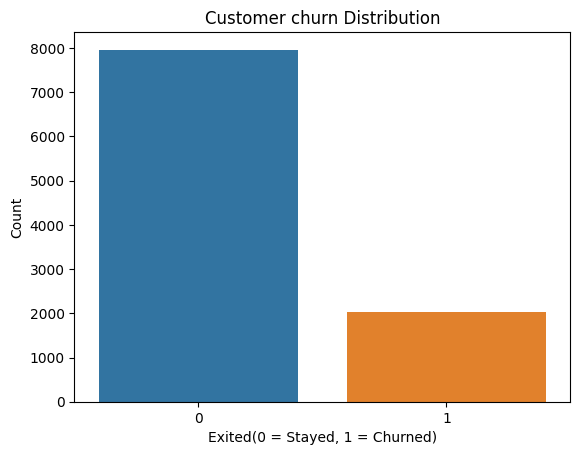

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Exited'])
plt.title("Customer churn Distribution")
plt.xlabel("Exited(0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
plt.show()

* This shows that 20% customers have churned.
* Now, we'll identify the Key factors behind the churn.
* Which customers are at higher risk of churning.
  

In [9]:
categorical_cols = ["Geography", "Gender"]
for col in categorical_cols:
    print(f"{col} Unique Values: {df[col].unique()}")

Geography Unique Values: ['France' 'Spain' 'Germany']
Gender Unique Values: ['Female' 'Male']


* Getting churn rates by Gender:

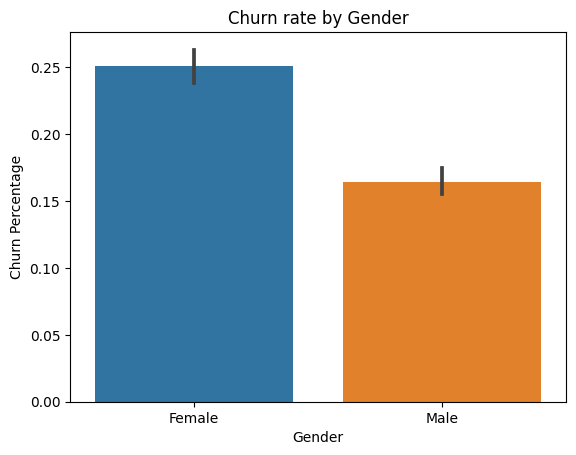

In [10]:
sns.barplot(x=df["Gender"], y=df["Exited"])
plt.title("Churn rate by Gender")
plt.ylabel("Churn Percentage")
plt.show()

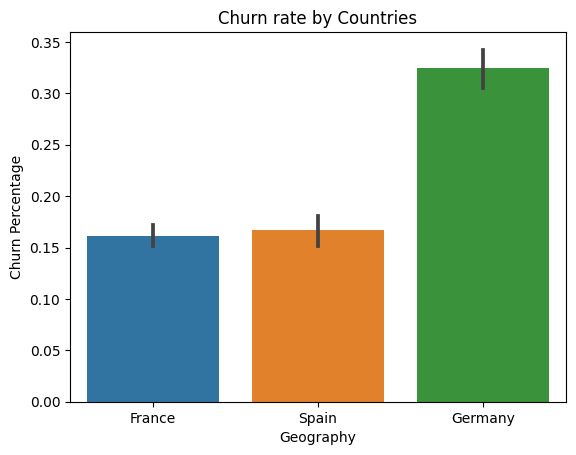

In [11]:
sns.barplot(x=df["Geography"], y=df["Exited"])
plt.title("Churn rate by Countries")
plt.ylabel("Churn Percentage")
plt.show()

# Churn vs. Credit Score

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

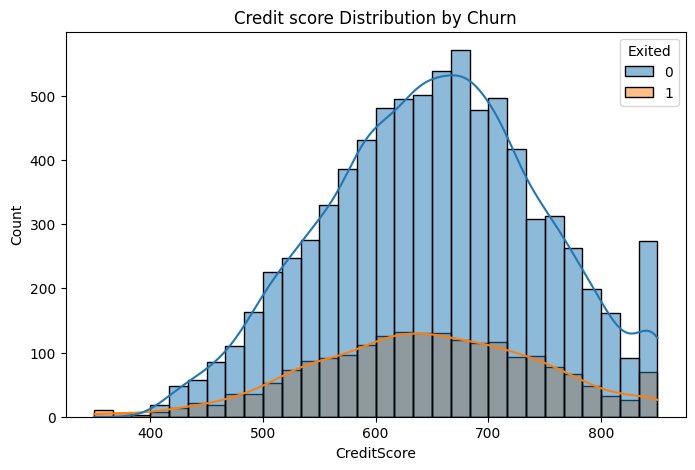

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="CreditScore", hue="Exited", kde=True, bins=30)
plt.title("Credit score Distribution by Churn")
plt.show()

# Churn VS AGE


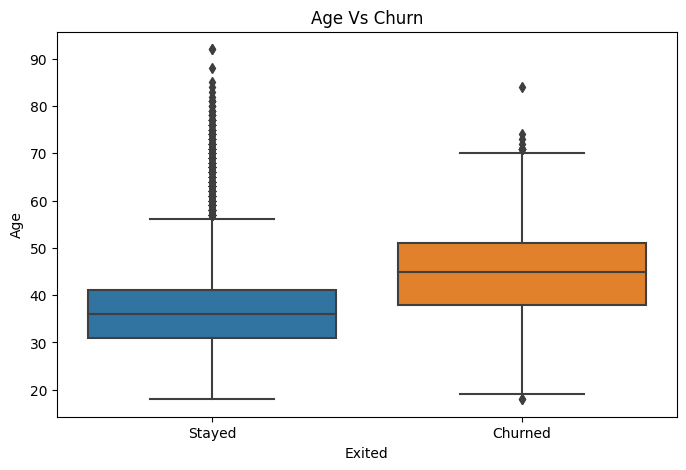

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Exited"], y=df["Age"])
plt.title("Age Vs Churn")
plt.xticks([0,1], ["Stayed", "Churned"])
plt.ylabel("Age")
plt.show()

Analyzing Account Balance & Tenure

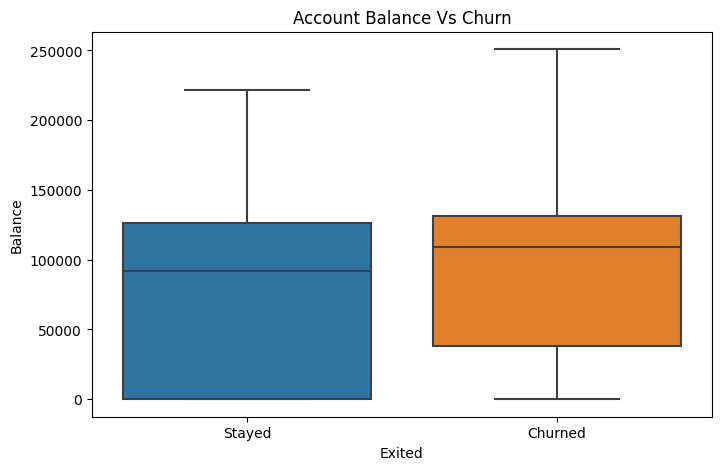

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Exited"], y=df["Balance"])
plt.title("Account Balance Vs Churn")
plt.xticks([0,1], ["Stayed", "Churned"])
plt.ylabel("Balance")
plt.show()

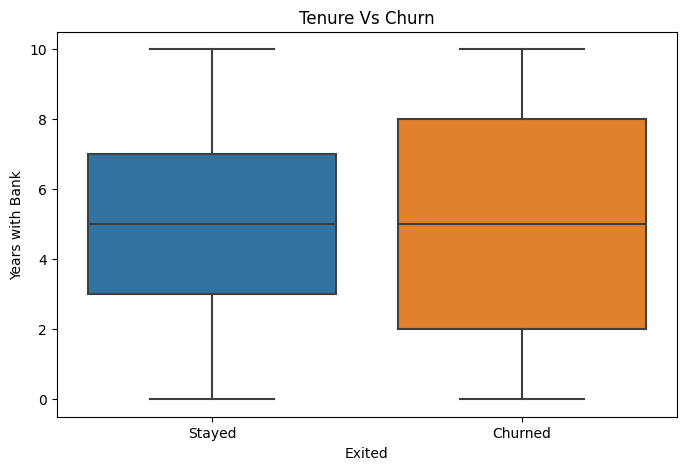

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Exited"], y=df["Tenure"])
plt.title("Tenure Vs Churn")
plt.xticks([0,1], ["Stayed", "Churned"])
plt.ylabel("Years with Bank")
plt.show()

# Correlation Between Features
  

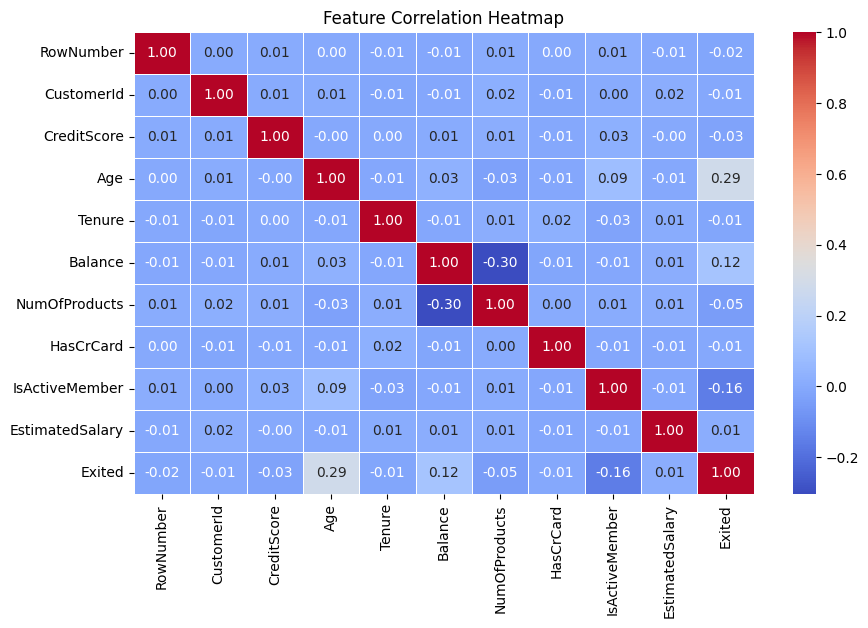

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Set title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()
